Import HTML and IMage from IPython

In [2]:
from collections import Counter
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import Ridge

# 4 A 0.1 Modeling - Regression

In [3]:
import os as os
os.getcwd()
os.chdir('C:\\Users\\ajaohri\\Desktop\\ODSP\\')
os.listdir()

['code',
 'code - Copy',
 'data',
 'Flexible Module week process of machine learning project.xlsx',
 'img',
 'ODSP readme.md',
 'ppt',
 'production',
 'references',
 'Scope-Matrix.xlsx',
 'to do',
 'word templates']

In [4]:
path='C:\\Users\\ajaohri\\Desktop\\ODSP\\data'
os.chdir(path) 
os.listdir()

['adult.data.txt',
 'airquality.csv',
 'BigDiamonds.csv',
 'BigDiamonds.csv.zip',
 'BigDiamonds.zip',
 'daily-total-female-births.csv',
 'DecisionTree.png',
 'df3.csv',
 'diamonds.csv',
 'dot_data.txt',
 'fruit_classifier.txt',
 'iris.csv',
 'iris2.csv',
 'iris3.csv',
 'mtcars.csv',
 'plantTraits.csv',
 'R_ Plant Species Traits Data.html',
 'tree.dot',
 'xgb.pkl']

In [5]:

%%time
%time

df=pd.read_csv('C:\\Users\\ajaohri\\Desktop\\ODSP\\data\\diamonds.csv')

Wall time: 0 ns
Wall time: 133 ms


In [6]:
print('The input dataset df','has',df.shape[0],"rows and",df.shape[1],'columns')

The input dataset df has 53940 rows and 11 columns


In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
#df = df.drop("measurements", axis=1)

In [9]:
#drop missing values
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [11]:
%whos DataFrame


Variable   Type         Data/Info
---------------------------------
df         DataFrame           carat        cut c<...>[53940 rows x 10 columns]


In [12]:
#Modeling Process Classification
Image("C:\\Users\\ajaohri\\Desktop\\ODSP\\img\\Screenshot 2018-10-18 10.27.15.png")


<IPython.core.display.Image object>

# 4 A 0.2 Type of Problem
### Select Modeling Technique. Categorize by output.

- If the output of your model is a number, it’s a regression problem.
- If the output of your model is a class, it’s a classification problem.
- If the output of your model is a set of input groups, it’s a clustering problem.
- linear regression is used when the dependent variable is continuous,
- The predictors can be anything (nominal or ordinal categorical, or continuous, or a mix)
- You can also convert variables from one type to another

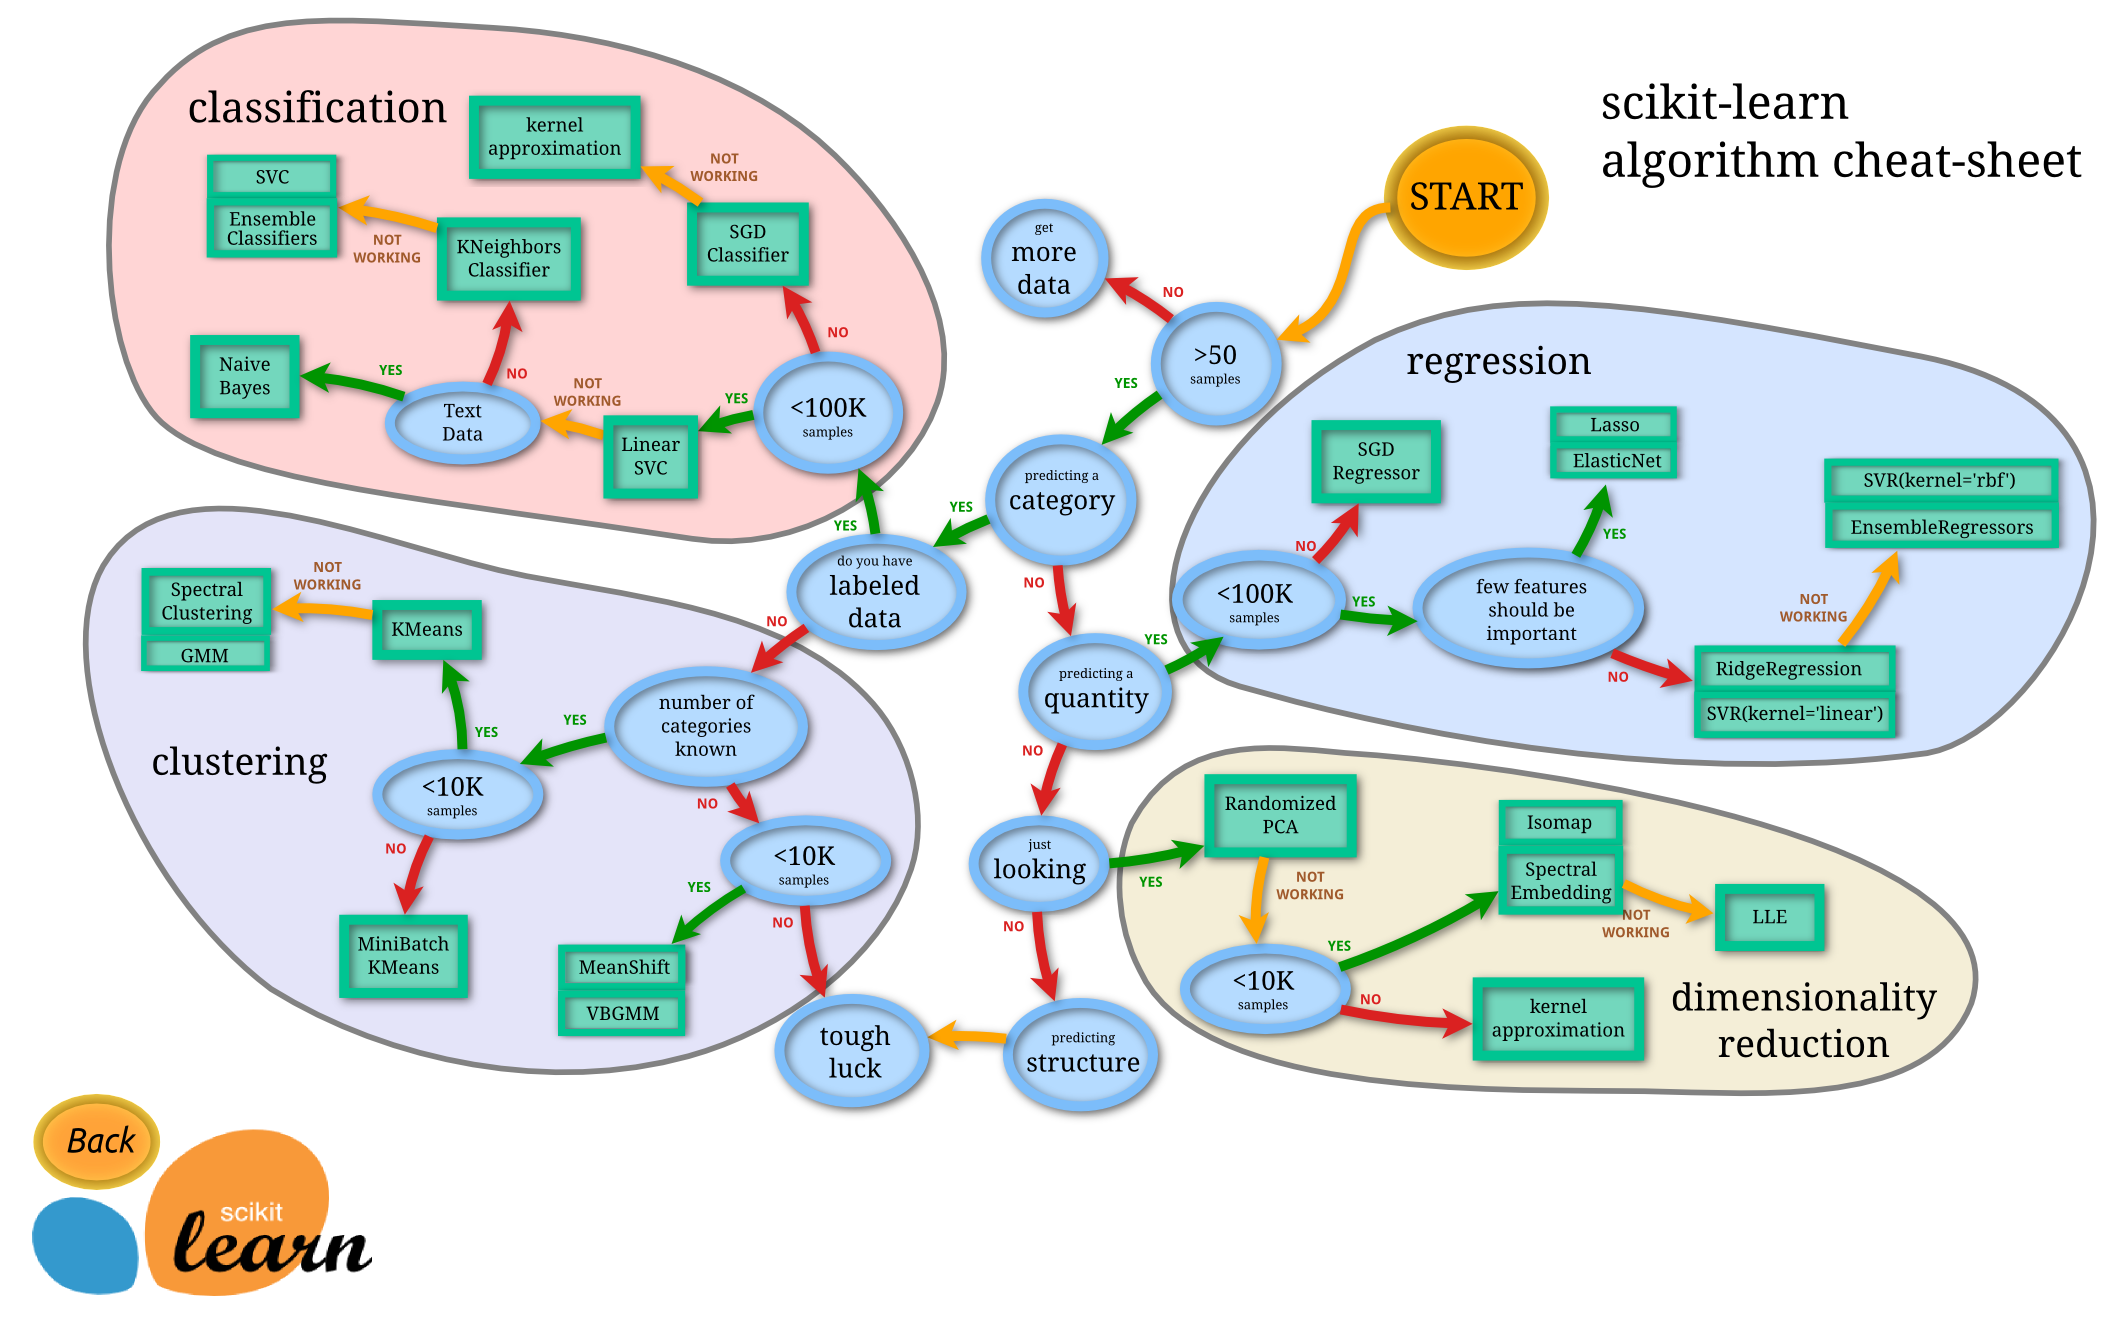

In [13]:
Image("C:\\Users\\ajaohri\\Desktop\\ODSP\\img\\ml_map.png") 

### 4 A 0.21 Factors affecting the choice of a model are:

- Whether the model meets the business goals
- How much pre processing the model needs
- How accurate the model is
- How explainable the model is
- How fast the model is: How long does it take to build a model, and how long does the model take to make predictions.
- How scalable the model is

#### Modeling Assumptions


In [14]:
#Random Rows to see data
rows = np.random.choice(df.index.values, round(0.00001*len(df)))
print(rows)

[12702]


In [15]:
type(rows)

numpy.ndarray

In [16]:
rows=list(rows)

In [17]:
df.iloc[rows,:]

carat        cut color clarity  depth  table  price     x     y     z
12702   0.26  Very Good     E    VVS1   62.9   58.0    599  4.06  4.08  2.56

In [18]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

In [19]:
#split using scikit learn

In [20]:
names=df.columns
names

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [21]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [22]:
import datetime 
datetime.datetime.now() 

datetime.datetime(2018, 12, 21, 12, 4, 21, 470780)

In [23]:
df=pd.get_dummies(df, drop_first=True,sparse=True)

In [24]:
X=df.columns

In [25]:
X=list(X)

In [26]:
Y=str('price')


In [27]:
df.head()

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0          1   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0          0   
2   0.23   56.9   65.0    327  4.05  4.07  2.31         1          0   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         0          0   
4   0.31   63.3   58.0    335  4.34  4.35  2.75         1          0   

   cut_Premium      ...       color_H  color_I  color_J  clarity_IF  \
0            0      ...             0        0        0           0   
1            1      ...             0        0        0           0   
2            0      ...             0        0        0           0   
3            1      ...             0        1        0           0   
4            0      ...             0        0        1           0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0            0            1            0            0             0   
1            1            0            0            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            1            0            0             0   

   clarity_VVS2  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 24 columns]

In [28]:
X

['carat',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [29]:
X.remove(Y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[[Y]], test_size=0.3, random_state=42)


In [31]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(37758, 23)
(37758, 1)
(16182, 23)
(16182, 1)


### 4 A 0.22 Using Random Forests for Feature Importance


In [32]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier(max_depth=5) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.04585341737733284

Putting max_depth=5 to save computational time

In [33]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

# 4 A 0.4 REGRESSION METRICS 
https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score
The explained_variance_score computes the explained variance regression score.
If  is the estimated target output,  the corresponding (correct) target output, and  is Variance, the square of the standard deviation, then the explained variance is estimated as follow:
The best possible score is 1.0, lower values are worse.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or -norm loss.

The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

The r2_score function computes R², the coefficient of determination. It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html#sklearn.base.RegressorMixin 
score(X, y, sample_weight=None) 
Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [34]:
feature_importances.head(10)

importance
carat          0.239759
x              0.185795
y              0.081958
z              0.076963
color_E        0.065830
clarity_VS2    0.058381
color_G        0.056565
color_F        0.048184
clarity_SI2    0.029813
color_H        0.027756

In [35]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#explained_variance_score(y_true, y_pred) 
#mean_absolute_error(y_true, y_pred)
#mean_squared_error(y_true, y_pred)
#r2_score(y_true, y_pred, multioutput='uniform_average')

### 4 A 0.41 Linear Regression
LinearRegression fits a linear model with coefficients  to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. 


LinearRegression will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

coefficient estimates for Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design matrix  have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

In [36]:

from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression().fit(X_train, y_train).predict(X_test)
lm[0:5]

array([[ 711.56570501],
       [3197.40419579],
       [1943.02948182],
       [2080.07561855],
       [9871.56234383]])

In [38]:
print("explained variance  Score for Linear  Regression model is ",explained_variance_score(y_test,lm)) 
print("mean_absolute_error for Linear  Regression model is ",mean_absolute_error(y_test, lm))
print("mean_squared_error for Linear  Regression model is ",mean_squared_error(y_test, lm))
print("r2_score for Linear  Regression model is ",r2_score(y_test, lm, multioutput='uniform_average'))

explained variance  Score for Linear  Regression model is  0.9201884017630061
mean_absolute_error for Linear  Regression model is  734.2415163929642
mean_squared_error for Linear  Regression model is  1244765.4357158693
r2_score for Linear  Regression model is  0.9201866914388087


Text(0,0.5,'Predictions')

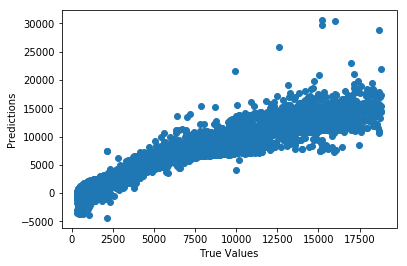

In [39]:
## The line / model
plt.scatter(y_test, lm)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [40]:
print (LinearRegression().fit(X_train, y_train).coef_[0])
print (X)
print (LinearRegression().fit(X_train, y_train).intercept_)

[ 1.12262051e+04 -6.31199113e+01 -2.70960563e+01 -9.80549238e+02
 -5.63315299e+00 -4.81547644e+01  5.95521080e+02  8.46196258e+02
  7.77769963e+02  7.43301360e+02 -2.17028968e+02 -2.73303976e+02
 -5.00160238e+02 -9.98634669e+02 -1.47608423e+03 -2.38198979e+03
  5.45903730e+03  3.75170967e+03  2.78194055e+03  4.65783431e+03
  4.33672558e+03  5.10133518e+03  5.02829553e+03]
['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
[2041.28627777]


## 4 A 0.5 Cross Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation 
LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out

**K-Folds cross-validator**
Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [41]:
os.chdir('C:\\Users\\ajaohri\\Desktop\\ODSP\\img')

In [42]:
%pwd

'C:\\Users\\ajaohri\\Desktop\\ODSP\\img'

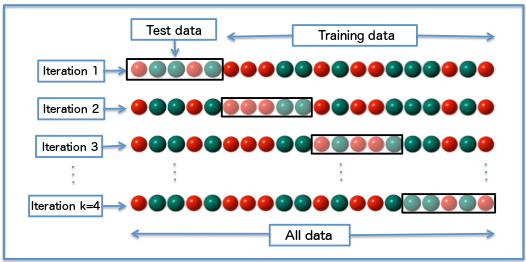

In [43]:
Image('K-fold.jpg')

In [44]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 10 folds 
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [45]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
# Perform 10-fold cross validation
scores = cross_val_score(LinearRegression().fit(X_train, y_train), df[X], df[[Y]], cv=10)
print ('Cross-validated scores:'), scores


Cross-validated scores:


(None, array([  0.05479044,   0.48465146,   0.59857759,   0.69671874,
          0.59057537,   0.92301258, -26.79371197, -11.35853264,
         -2.16631941,  -0.67525107]))

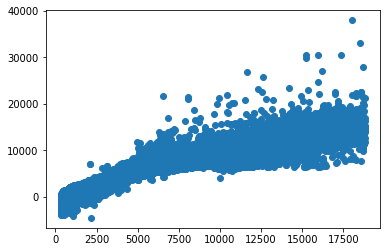

In [47]:
# Make cross validated predictions
predictions = cross_val_predict(LinearRegression().fit(X_train, y_train), df[X], df[[Y]], cv=10)
plt.scatter(df[[Y]], predictions)

In [48]:
accuracy = metrics.r2_score(df[[Y]], predictions)
print ('Cross-Predicted Accuracy:'), accuracy

Cross-Predicted Accuracy:


(None, 0.8995880373055227)

#### 4 A 0.42 Using Statsmodel for Linear Regression. Statsmodel gives better explanation for linear regression than scikit learn

In [49]:
from statsmodels.formula.api  import ols
#you need a Pandas dataframe df 
est = ols(formula = 'price ~  carat + depth +table +x +y +z', data = df).fit()

In [50]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:04:47   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#you need a Pandas dataframe df 
newmodel = ols(formula = 'price ~  carat ', data = df).fit()

In [52]:
newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:04:47   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4 A 0.6 Polynomial Models
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [54]:
poly=PolynomialFeatures(degree=2)
x=df[X].values
y=df[Y].values

In [55]:
x

array([[ 0.23, 61.5 , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.21, 59.8 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.23, 56.9 , 65.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.86, 61.  , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, 62.2 , 55.  , ...,  0.  ,  0.  ,  0.  ]])

In [56]:
y

array([ 326,  326,  327, ..., 2757, 2757, 2757], dtype=int64)

In [57]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)


In [58]:
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y_train)

# Obtain coefficients
lg.coef_

array([[ 6.65967980e-10, -2.06381607e+04,  2.82755128e+02,
         8.48731598e+02, -1.17567003e+04,  3.92868527e+03,
         1.07178402e+04, -1.19405727e+03,  1.06195805e+03,
        -1.05659048e+03, -1.90794341e+03, -1.26179835e+03,
         6.92238113e+02,  7.79724753e+02,  1.76930616e+03,
         4.99998141e+03,  8.37114920e+03,  4.85557120e+03,
         7.86924558e+03,  8.32846960e+03,  1.13749018e+04,
         6.67190302e+03,  7.51125947e+03,  3.61505585e+03,
        -1.20502614e+03,  6.69039474e+01,  1.93094036e+02,
        -6.32442808e+03,  5.64874860e+03,  3.51573837e+03,
        -1.33906219e+03, -3.02384621e+02, -4.60176880e+02,
        -1.27047507e+03,  6.26140628e+02,  1.02372039e+03,
         4.90136399e+01, -8.23082322e+02, -1.12595758e+03,
        -2.14901910e+03,  1.03892268e+04,  8.86713471e+03,
         6.81752638e+03,  1.02103569e+04,  9.38524068e+03,
         1.13356555e+04,  1.10204896e+04, -1.97478919e+00,
        -4.12034745e+00,  2.24582693e+02, -1.32459313e+0

In [59]:
X_

array([[ 1.  ,  1.21, 61.3 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.31, 62.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  1.21, 62.4 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 1.  ,  0.33, 60.3 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.9 , 62.8 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  1.14, 60.4 , ...,  0.  ,  0.  ,  0.  ]])

In [60]:
X_.shape

(37758, 300)

In [61]:
X_test_.shape

(16182, 300)

In [62]:
# Predict
lg.predict(X_test_)

array([[  499.30221603],
       [ 2716.7860558 ],
       [ 1402.26412763],
       ...,
       [11758.76384925],
       [ 3976.23344545],
       [ 1563.05958435]])

In [63]:
lg.fit(X_, y_train).predict(X_test_)


array([[  499.30221603],
       [ 2716.7860558 ],
       [ 1402.26412763],
       ...,
       [11758.76384925],
       [ 3976.23344545],
       [ 1563.05958435]])

Text(0,0.5,'Predictions')

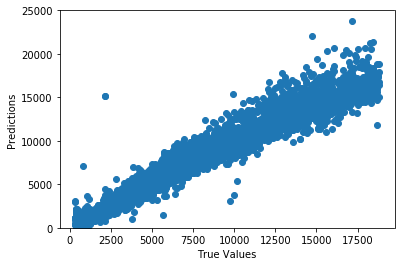

In [64]:
plt.scatter(y_test, lg.fit(X_, y_train).predict(X_test_))
plt.ylim(ymin=0)
plt.ylim(ymax=25000)

plt.xlabel('True Values')
plt.ylabel('Predictions')

In [65]:
y_test.head()

price
1388     559
50052   2201
41645   1238
42377   1304
17244   6901

In [66]:
print("explained variance  Score for Polynominal  Regression model is ",explained_variance_score(y_test, lg.fit(X_, y_train).predict(X_test_))) 
print("mean_absolute_error for Polynominal  Regression model is ",mean_absolute_error(y_test, lg.fit(X_, y_train).predict(X_test_)))
print("mean_squared_error for Polynominal  Regression model is ",mean_squared_error(y_test, lg.fit(X_, y_train).predict(X_test_)))
print("r2_score for Linear  Polynominal model is ",r2_score(y_test, lg.fit(X_, y_train).predict(X_test_), multioutput='uniform_average'))

explained variance  Score for Polynominal  Regression model is  0.8872650100576698
mean_absolute_error for Polynominal  Regression model is  410.6721261077862
mean_squared_error for Polynominal  Regression model is  1758213.2406399953
r2_score for Linear  Polynominal model is  0.8872648517824016


## 4 A 0.7 , 0.8, 0.9 Ridge , Lasso and ElasticNet Regression

In [67]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 


### 4 A 0.7 Ridge Regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization.



Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares

In [68]:
regR = linear_model.Ridge (alpha = .5)

In [69]:
regR.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
regR.coef_

array([[ 1.12092273e+04, -6.30555572e+01, -2.71521875e+01,
        -9.74492692e+02, -5.39662813e+00, -4.79545046e+01,
         5.97182197e+02,  8.48126549e+02,  7.79559212e+02,
         7.45420909e+02, -2.16414076e+02, -2.72702621e+02,
        -4.99202105e+02, -9.97454159e+02, -1.47434331e+03,
        -2.37956262e+03,  5.42439268e+03,  3.71919505e+03,
         2.75005923e+03,  4.62489579e+03,  4.30412231e+03,
         5.06795888e+03,  4.99519506e+03]])

In [71]:
regR.intercept_

array([2046.78984666])

In [72]:
predictionR=regR.fit(X_train,y_train).predict(X_test)
predictionR

array([[  708.84499817],
       [ 3198.22526381],
       [ 1942.63687008],
       ...,
       [10607.93523073],
       [ 4105.89890476],
       [ 1993.23878594]])

In [73]:
print("explained variance  Score for Ridge  Regression model is ",explained_variance_score(y_test,predictionR))
print("mean_absolute_error for Ridge  Regression model is ",mean_absolute_error(y_test,predictionR))
print("mean_squared_error for Ridge  Regression model is ",mean_squared_error(y_test,predictionR))
print("r2_score for   Ridge Regression model is ",r2_score(y_test, predictionR, multioutput='uniform_average'))

explained variance  Score for Ridge  Regression model is  0.9202013635467372
mean_absolute_error for Ridge  Regression model is  734.1075503394964
mean_squared_error for Ridge  Regression model is  1244563.5891813317
r2_score for   Ridge Regression model is  0.9201996336681483


### 4 A 0.8 Lasso Regression

Linear Model trained with L1 prior as regularizer (aka the Lasso). The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing.

Lasso method overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant. Therefore, you might end up with fewer features included in the model than you started with, which is a huge advantage.

In [74]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 0.1)

In [75]:
lasso

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
model=lasso.fit(X_train,y_train)
model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
predictions=model.predict(X_test)
predictions


array([  708.9004725 ,  3199.275131  ,  1942.81483073, ...,
       10606.97534948,  4106.16354939,  1993.64523074])

In [78]:
print(lasso.coef_) 

print(lasso.intercept_) 

[ 1.12085795e+04 -6.37966274e+01 -2.74315806e+01 -9.76221745e+02
 -4.96753735e+00 -4.63388595e+01  5.85104454e+02  8.35926825e+02
  7.67570241e+02  7.33616093e+02 -2.11660389e+02 -2.67969659e+02
 -4.94278968e+02 -9.92485982e+02 -1.46885462e+03 -2.37358635e+03
  5.40220148e+03  3.69886533e+03  2.72962682e+03  4.60389810e+03
  4.28360605e+03  5.04645662e+03  4.97408191e+03]
[2138.60345661]


In [79]:
print("explained variance  Score for Lasso  Regression model is ",explained_variance_score(y_test,predictions))
print("mean_absolute_error for Lasso  Regression model is ",mean_absolute_error(y_test,predictions))
print("mean_squared_error for Lasso  Regression model is ",mean_squared_error(y_test,predictions))
print("r2_score for   Lasso Regression model is ",r2_score(y_test, predictions, multioutput='uniform_average'))

explained variance  Score for Lasso  Regression model is  0.9202151969788052
mean_absolute_error for Lasso  Regression model is  733.7010595232128
mean_squared_error for Lasso  Regression model is  1244347.9078636076
r2_score for   Lasso Regression model is  0.9202134629721026


### 4 A 0.9 ElasticNet Regression
Linear regression with combined L1 and L2 priors as regularizer. 

ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.



In [80]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(random_state=0)
enet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
print(enet.coef_) 

[ 666.5958124   -12.40075507  -24.24976799 1115.78550719  986.42993699
  641.17702542  -35.93581559   43.51728423   33.06343789    8.13083455
   10.51863032   33.23273693   54.75639581  -23.58715467  -32.26359342
  -75.57378407   60.3344141  -115.5511391  -179.20548029   71.43070495
   49.56628549   79.18435728  108.923644  ]


In [82]:
print(enet.intercept_) 

[-8767.28771199]


In [83]:
enet.predict(X_test) 

array([-598.82511301, 3149.90351519, 1436.77518245, ..., 8611.98410862,
       4099.71709618, 1453.8689035 ])

In [84]:
print("explained variance  Score for ElasticNet  Regression model is ",explained_variance_score(y_test,enet.predict(X_test) ))
print("mean_absolute_error for ElasticNet  Regression model is ",mean_absolute_error(y_test,enet.predict(X_test) ))
print("mean_squared_error for ElasticNet  Regression model is ",mean_squared_error(y_test,enet.predict(X_test) ))
print("r2_score for   ElasticNet Regression model is ",r2_score(y_test, enet.predict(X_test) , multioutput='uniform_average'))

explained variance  Score for ElasticNet  Regression model is  0.7858524720064659
mean_absolute_error for ElasticNet  Regression model is  1222.073723476428
mean_squared_error for ElasticNet  Regression model is  3340404.064050021
r2_score for   ElasticNet Regression model is  0.7858161123105462


### 4 A 1.0 LARS Least Angle Regression
Least Angle Regression (LARS) relates to the classic model-selection method known as Forward Selection, or “forward stepwise regression,” described in Weisberg [(1980), Section 8.5]: given a collection of possible predictors, we select the one having largest absolute correlation with the response y

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the predictor most correlated with the response. When there are multiple predictors having equal correlation, instead of continuing along the same predictor, it proceeds in a direction equiangular between the predictors.

The advantages of LARS are:

It is numerically efficient in contexts where p >> n (i.e., when the number of dimensions is significantly greater than the number of points)
It is computationally just as fast as forward selection and has the same order of complexity as an ordinary least squares.
It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
If two variables are almost equally correlated with the response, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
It is easily modified to produce solutions for other estimators, like the Lasso.
The disadvantages of the LARS method include:

Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.

In [85]:
df[X].head()

carat  depth  table     x     y     z  cut_Good  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0  3.95  3.98  2.43         0          1            0   
1   0.21   59.8   61.0  3.89  3.84  2.31         0          0            1   
2   0.23   56.9   65.0  4.05  4.07  2.31         1          0            0   
3   0.29   62.4   58.0  4.20  4.23  2.63         0          0            1   
4   0.31   63.3   58.0  4.34  4.35  2.75         1          0            0   

   cut_Very Good      ...       color_H  color_I  color_J  clarity_IF  \
0              0      ...             0        0        0           0   
1              0      ...             0        0        0           0   
2              0      ...             0        0        0           0   
3              0      ...             0        1        0           0   
4              0      ...             0        0        1           0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0            0            1            0            0             0   
1            1            0            0            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            1            0            0             0   

   clarity_VVS2  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [86]:
df[Y].head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [87]:
## from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=1)
reg.fit(X_train,y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=1, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [88]:
reg.fit(X_train,y_train).predict(X_test)

array([  39.52196316, 2415.65440475, 1157.70193567, ..., 8915.07549496,
       3324.17563241, 1157.70193567])

In [89]:
print(reg.coef_)

[6988.62482819    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.        ]


In [90]:
print("explained variance  Score for LARS  Regression model  is ",explained_variance_score(y_test,reg.fit(X_train,y_train).predict(X_test) ))
print("mean_absolute_error for LARS  Regression model  is ",mean_absolute_error(y_test,reg.fit(X_train,y_train).predict(X_test) ))
print("mean_squared_error for LARS  Regression model  is ",mean_squared_error(y_test,reg.fit(X_train,y_train).predict(X_test) ))
print("r2_score for   LARS Regression model is ",r2_score(y_test, reg.fit(X_train,y_train).predict(X_test) , multioutput='uniform_average'))

explained variance  Score for LARS  Regression model  is  0.8408127781124325
mean_absolute_error for LARS  Regression model  is  968.2913992799402
mean_squared_error for LARS  Regression model  is  2483071.9452610957
r2_score for   LARS Regression model is  0.8407875237692586


In [91]:
print("Accuracy Score for LARS  Regression model with dummy variables is ",reg.score(X_test, y_test))

Accuracy Score for LARS  Regression model with dummy variables is  0.8407875237692586


In [92]:
#  DECISION TREE REGRESSION AND ADABOOSTER

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostRegressor

In [94]:
regr_1 = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train).predict(X_test)


In [95]:
print("explained variance  Score for DecisionTree  Regression model with 1 variable  is ",explained_variance_score(y_test,regr_1 ))
print("mean_absolute_error for DecisionTree  Regression model with 1 variable  is ",mean_absolute_error(y_test,regr_1 ))
print("mean_squared_error for DecisionTree  Regression model with 1 variable  is ",mean_squared_error(y_test,regr_1 ))
print("r2_score for   DecisionTree Regression model with 1 variable  is ",r2_score(y_test, regr_1 , multioutput='uniform_average'))

explained variance  Score for DecisionTree  Regression model with 1 variable  is  0.8303172335812821
mean_absolute_error for DecisionTree  Regression model with 1 variable  is  1030.8976303099785
mean_squared_error for DecisionTree  Regression model with 1 variable  is  2648065.5140524847
r2_score for   DecisionTree Regression model with 1 variable  is  0.8302082754717783


In [96]:
#creating a threshold of 0.5 for model
#regr_1 =(regr_1>0.5).astype(int)
#print("Accuracy Score for DecisionTree Regressor  model is",accuracy_score(y_test,regr_1))
#print("Area Under Curve for DecisionTree Regressor  model is",roc_auc_score(y_test,regr_1))

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=3, random_state=np.random.RandomState(0)).fit(X_train, y_train).predict(X_test)
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
print("explained variance  Score for AdaBoostDecisionTree  Regression model  is ",explained_variance_score(y_test,regr_2 ))
print("mean_absolute_error for AdaBoost  DecisionTree  Regression model  is ",mean_absolute_error(y_test,regr_2 ))
print("mean_squared_error for AdaBoost DecisionTree  Regression model  is ",mean_squared_error(y_test,regr_2 ))
print("r2_score for  AdaBoost  DecisionTree Regression model is ",r2_score(y_test, regr_2 , multioutput='uniform_average'))

explained variance  Score for AdaBoostDecisionTree  Regression model  is  0.8388295866516606
mean_absolute_error for AdaBoost  DecisionTree  Regression model  is  1037.2590812183312
mean_squared_error for AdaBoost DecisionTree  Regression model  is  2543439.13212281
r2_score for  AdaBoost  DecisionTree Regression model is  0.836916830726441


In [98]:
print("                                            Explained Variance Score")
print(" Linear  Regression model               ",explained_variance_score(y_test,lm)) 
print(" Polynominal  Regression model          ",explained_variance_score(y_test, lg.fit(X_, y_train).predict(X_test_))) 
print(" Ridge  Regression model                ",explained_variance_score(y_test,predictionR))
print(" Lasso  Regression model                ",explained_variance_score(y_test,predictions))
print(" ElasticNet  Regression model           ",explained_variance_score(y_test,enet.predict(X_test) ))
print(" LARS  Regression model                 ",explained_variance_score(y_test,reg.fit(X_train,y_train).predict(X_test)))
print(" DecisionTree  Regression model         ",explained_variance_score(y_test,regr_1 ))
print(" AdaBoostDecisionTree  Regression model ",explained_variance_score(y_test,regr_2 ))

                                            Explained Variance Score
 Linear  Regression model                0.9201884017630061
 Polynominal  Regression model           0.8872650100576698
 Ridge  Regression model                 0.9202013635467372
 Lasso  Regression model                 0.9202151969788052
 ElasticNet  Regression model            0.7858524720064659
 LARS  Regression model                  0.8408127781124325
 DecisionTree  Regression model          0.8303172335812821
 AdaBoostDecisionTree  Regression model  0.8388295866516606


In [99]:
print("mean_squared_error for ElasticNet  Regression model is ",mean_squared_error(y_test,enet.predict(X_test) ))
print("r2_score for   ElasticNet Regression model is ",r2_score(y_test, enet.predict(X_test) , multioutput='uniform_average'))

mean_squared_error for ElasticNet  Regression model is  3340404.064050021
r2_score for   ElasticNet Regression model is  0.7858161123105462


In [100]:
print("                                        mean_absolute_error")
print("Linear  Regression model                 ",mean_absolute_error(y_test, lm))
print("Polynominal  Regression model            ",mean_absolute_error(y_test, lg.fit(X_, y_train).predict(X_test_)))
print("Ridge  Regression model                  ",mean_absolute_error(y_test,predictionR))
print("Lasso  Regression model                  ",mean_absolute_error(y_test,predictions))
print("ElasticNet  Regression model             ",mean_absolute_error(y_test,enet.predict(X_test) ))
print("LARS  Regression model                   ",mean_absolute_error(y_test,reg.fit(X_train,y_train).predict(X_test) ))
print("DecisionTree  Regression model           ",mean_absolute_error(y_test,regr_1 ))
print("AdaBoost  DecisionTree  Regression model ",mean_absolute_error(y_test,regr_2 ))

                                        mean_absolute_error
Linear  Regression model                  734.2415163929642
Polynominal  Regression model             410.6721261077862
Ridge  Regression model                   734.1075503394964
Lasso  Regression model                   733.7010595232128
ElasticNet  Regression model              1222.073723476428
LARS  Regression model                    968.2913992799402
DecisionTree  Regression model            1030.8976303099785
AdaBoost  DecisionTree  Regression model  1037.2590812183312


In [101]:
print("                                                     mean_squared_error")
print("Linear  Regression model                           ",mean_squared_error(y_test, lm))
print("Polynominal  Regression model                      ",mean_squared_error(y_test, lg.fit(X_, y_train).predict(X_test_)))
print("Ridge  Regression model                            ",mean_squared_error(y_test,predictionR))
print("Lasso  Regression model                            ",mean_squared_error(y_test,predictions))
print("ElasticNet  Regression model                       ",mean_squared_error(y_test,enet.predict(X_test)))
print("LARS  Regression model                             ",mean_squared_error(y_test,reg.fit(X_train,y_train).predict(X_test) ))
print("DecisionTree  Regression model                     ",mean_squared_error(y_test,regr_1 ))
print("AdaBoost DecisionTree  Regression model            ",mean_squared_error(y_test,regr_2 ))

                                                     mean_squared_error
Linear  Regression model                            1244765.4357158693
Polynominal  Regression model                       1758213.2406399953
Ridge  Regression model                             1244563.5891813317
Lasso  Regression model                             1244347.9078636076
ElasticNet  Regression model                        3340404.064050021
LARS  Regression model                              2483071.9452610957
DecisionTree  Regression model                      2648065.5140524847
AdaBoost DecisionTree  Regression model             2543439.13212281


In [102]:
print("                                                      r2_score")
print("Linear  Regression model                             ",r2_score(y_test, lm, multioutput='uniform_average'))
print("Polynominal Regression model                         ",r2_score(y_test, lg.fit(X_, y_train).predict(X_test_), multioutput='uniform_average'))
print("Ridge Regression model                               ",r2_score(y_test, predictionR, multioutput='uniform_average'))
print("Lasso Regression model                               ",r2_score(y_test, predictions, multioutput='uniform_average'))
print("ElasticNet Regression model                          ",r2_score(y_test, enet.predict(X_test), multioutput='uniform_average'))
print("LARS Regression model                                ",r2_score(y_test, reg.fit(X_train,y_train).predict(X_test) , multioutput='uniform_average'))
print("DecisionTree Regression model                        ",r2_score(y_test, regr_1 , multioutput='uniform_average'))
print("AdaBoost  DecisionTree Regression model              ",r2_score(y_test, regr_2 , multioutput='uniform_average'))

                                                      r2_score
Linear  Regression model                              0.9201866914388087
Polynominal Regression model                          0.8872648517824016
Ridge Regression model                                0.9201996336681483
Lasso Regression model                                0.9202134629721026
ElasticNet Regression model                           0.7858161123105462
LARS Regression model                                 0.8407875237692586
DecisionTree Regression model                         0.8302082754717783
AdaBoost  DecisionTree Regression model               0.836916830726441


## Ensemble Building using Stacking

In [175]:
df2=pd.DataFrame()

In [184]:
p1=LinearRegression().fit(X_train, y_train).predict(X_test)
p2=lg.fit(X_, y_train).predict(X_test_)
p3=predictionR
p4=linear_model.Lasso(alpha = 0.1).fit(X_train,y_train).predict(X_test)
p5=enet.predict(X_test)
p6=reg.fit(X_train,y_train).predict(X_test)
p7=regr_1
p8=regr_2
#y_test

In [185]:
print(np.shape(p1))
print(np.shape(p2))
print(np.shape(p3))
print(np.shape(p4))
print(np.shape(p5))
print(np.shape(p6))
print(np.shape(p7))
print(np.shape(p8))


(16182, 1)
(16182, 1)
(16182, 1)
(16182,)
(16182,)
(16182,)
(16182,)
(16182,)


In [186]:
p4=np.reshape(p4,(16182, 1))
p5=np.reshape(p5,(16182, 1))
p6=np.reshape(p6,(16182, 1))
p7=np.reshape(p7,(16182, 1))
p8=np.reshape(p8,(16182, 1))

In [196]:
len(p1)

16182

In [231]:
df1=pd.DataFrame(data=p1,    # values
              index=range(0,len(p1)),    # 1st column as index
              columns=['Linear'])  # 1st row as the column names
df1.head()

Linear
0   711.565705
1  3197.404196
2  1943.029482
3  2080.075619
4  9871.562344

In [232]:
df2=pd.DataFrame(data=p2,    # values
               index=range(0,len(p2)),    # 1st column as index
              columns=['Polynomial'])  # 1st row as the column names
df2.head()

In [234]:
df3=pd.DataFrame(data=p3,    # values
               index=range(0,len(p3)),    # 1st column as index
              columns=['Ridge'])  # 1st row as the column names
df3.head()

Ridge
0   708.844998
1  3198.225264
2  1942.636870
3  2079.847242
4  9870.063325

In [235]:
df4=pd.DataFrame(data=p4,    # values
               index=range(0,len(p4)),    # 1st column as index
              columns=['Lasso'])  # 1st row as the column names
df4.head()

Lasso
0   708.900473
1  3199.275131
2  1942.814831
3  2080.457310
4  9869.205386

In [236]:
df5=pd.DataFrame(data=p5,    # values
               index=range(0,len(p5)),    # 1st column as index
              columns=['ElasticNet'])  # 1st row as the column names
df5.head()

ElasticNet
0  -598.825113
1  3149.903515
2  1436.775182
3  1759.666139
4  8561.720847

In [237]:
df6=pd.DataFrame(data=p6,    # values
               index=range(0,len(p6)),    # 1st column as index
              columns=['LARS'])  # 1st row as the column names
df6.head()

LARS
0    39.521963
1  2415.654405
2  1157.701936
3  1367.360681
4  9194.620488

In [238]:
df7=pd.DataFrame(data=p7,    # values
               index=range(0,len(p7)),    # 1st column as index
              columns=['DT'])  # 1st row as the column names
df7.head()

DT
0   1057.882546
1   1057.882546
2   1057.882546
3   1057.882546
4  12330.318547

In [239]:
df8=pd.DataFrame(data=p8,    # values
               index=range(0,len(p8)),    # 1st column as index
              columns=['ADA'])  # 1st row as the column names
df8.head()

ADA
0   1063.474319
1   1063.474319
2   1063.474319
3   1063.474319
4  12408.323263

In [241]:
y_test.head()

price
1388     559
50052   2201
41645   1238
42377   1304
17244   6901

In [269]:
type(y_test)

pandas.core.frame.DataFrame

In [270]:
y_test=y_test.reset_index()

In [271]:
y_test.head()

index  price
0   1388    559
1  50052   2201
2  41645   1238
3  42377   1304
4  17244   6901

In [277]:
y_test= y_test.drop(['index'], axis=1)

In [278]:
y_test.head()

price
0    559
1   2201
2   1238
3   1304
4   6901

In [279]:
dfs = [df1, df2, df3,df4,df5,df6,df7,df8,y_test]

In [280]:
from functools import reduce

In [281]:
pd.concat(dfs, axis=1, sort=False, join='outer').head()

Linear   Polynomial        Ridge        Lasso   ElasticNet  \
0   711.565705   499.302216   708.844998   708.900473  -598.825113   
1  3197.404196  2716.786056  3198.225264  3199.275131  3149.903515   
2  1943.029482  1402.264128  1942.636870  1942.814831  1436.775182   
3  2080.075619  1628.924757  2079.847242  2080.457310  1759.666139   
4  9871.562344  9901.310739  9870.063325  9869.205386  8561.720847   

          LARS            DT           ADA  price  
0    39.521963   1057.882546   1063.474319    559  
1  2415.654405   1057.882546   1063.474319   2201  
2  1157.701936   1057.882546   1063.474319   1238  
3  1367.360681   1057.882546   1063.474319   1304  
4  9194.620488  12330.318547  12408.323263   6901

In [282]:
dfs=pd.concat(dfs, axis=1, sort=False, join='outer')

In [285]:
from sklearn import linear_model
stacker= linear_model.LinearRegression()

In [286]:
stacker.fit(dfs[['Linear', 'Polynomial', 'Ridge','Lasso', 'ElasticNet', 'LARS','DT', 'ADA']], dfs['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [309]:
dfs.iloc[:,8:9].head()

price
0    559
1   2201
2   1238
3   1304
4   6901

In [310]:
dfs.iloc[:,0:8].head()

Linear   Polynomial        Ridge        Lasso   ElasticNet  \
0   711.565705   499.302216   708.844998   708.900473  -598.825113   
1  3197.404196  2716.786056  3198.225264  3199.275131  3149.903515   
2  1943.029482  1402.264128  1942.636870  1942.814831  1436.775182   
3  2080.075619  1628.924757  2079.847242  2080.457310  1759.666139   
4  9871.562344  9901.310739  9870.063325  9869.205386  8561.720847   

          LARS            DT           ADA  
0    39.521963   1057.882546   1063.474319  
1  2415.654405   1057.882546   1063.474319  
2  1157.701936   1057.882546   1063.474319  
3  1367.360681   1057.882546   1063.474319  
4  9194.620488  12330.318547  12408.323263

In [317]:
a=dfs.columns
a
a=list(a)
a.remove('price')
a

['Linear', 'Polynomial', 'Ridge', 'Lasso', 'ElasticNet', 'LARS', 'DT', 'ADA']

In [318]:
dfs['e'] = dfs[a].mean(axis=1)

In [319]:
dfs.head()

Linear   Polynomial        Ridge        Lasso   ElasticNet  \
0   711.565705   499.302216   708.844998   708.900473  -598.825113   
1  3197.404196  2716.786056  3198.225264  3199.275131  3149.903515   
2  1943.029482  1402.264128  1942.636870  1942.814831  1436.775182   
3  2080.075619  1628.924757  2079.847242  2080.457310  1759.666139   
4  9871.562344  9901.310739  9870.063325  9869.205386  8561.720847   

          LARS            DT           ADA  price             e  
0    39.521963   1057.882546   1063.474319    559    523.833388  
1  2415.654405   1057.882546   1063.474319   2201   2499.825679  
2  1157.701936   1057.882546   1063.474319   1238   1493.322412  
3  1367.360681   1057.882546   1063.474319   1304   1639.711076  
4  9194.620488  12330.318547  12408.323263   6901  10250.890617

In [320]:
from statsmodels.formula.api  import ols
 
est2 = ols(formula = 'price ~  e', data = dfs).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.974e+05
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:16:04   Log-Likelihood:            -1.3609e+05
No. Observations:               16182   AIC:                         2.722e+05
Df Residuals:                   16180   BIC:                         2.722e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -320.0948     12.758    -25.090      0.000    -345.102    -295.088
e              1.0729      0.002    444.319      0.000       1.068       1.078
==============================================================================
Omnibus:                     5671.208   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86216.382
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                      14.020   Cond. No.                     7.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [321]:
from statsmodels.formula.api  import ols
 
est2 = ols(formula = 'price ~  Linear + Polynomial +Ridge +Lasso +ElasticNet +LARS+DT+ADA', data = dfs).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.498e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:17:38   Log-Likelihood:            -1.3345e+05
No. Observations:               16182   AIC:                         2.669e+05
Df Residuals:                   16173   BIC:                         2.670e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -111.6897     12.759     -8.754      0.000    -136.699     -86.681
Linear        27.1835      2.948      9.220      0.000      21.404      32.963
Polynomial     0.4001      0.005     73.703      0.000       0.389       0.411
Ridge        -54.9321      5.179    -10.607      0.000     -65.083     -44.781
Lasso         28.3003      2.853      9.921      0.000      22.709      33.892
ElasticNet     0.3609      0.013     27.001      0.000       0.335       0.387
LARS          -0.5044      0.016    -31.135      0.000      -0.536      -0.473
DT             0.1645      0.016     10.052      0.000       0.132       0.197
ADA            0.0518      0.018      2.936      0.003       0.017       0.086
==============================================================================
Omnibus:                    24947.904   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        113008229.791
Skew:                           8.858   Prob(JB):                         0.00
Kurtosis:                     412.013   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""